# Welcome!
## to MSAIL Winter 2016
### Tutorial Series 00!

![](files/iris.jpg)
*We'll analyze these flowers!*

**TODO: insert image about clustering.**
**NOTE: downarrow to view outline.**

Outline:

 0. Introduction
   0. Introduce: MSAIL, Aaron, Sam
   1. Ask: Students' backgrounds?
   2. Setup: Jupyter
 1. What is Machine Learning?
   0. Programming: Hardcoded?
   1. Rules to Learn Rules: Flavors of ML
   2. Clustering Problem.
   3. Model, Iteration, E-M, KMeans
 2. Hands-on
   0. Iris Dataset
   1. iPython: sci-kit-learn.
   2. iPython: kmeans clustering
 3. Wrap-up
   0. Talk Feedback
   1. Discussion
 

## Introduce: MSAIL, Aaron, Sam


### Aaron

![](files/aaron.jpg)

### Sam

![](files/sam.jpg)

### MSAIL

![](files/MSAIL.png)

## Ask: Students' backgrounds?

* Programming Experience?
* Machine Learning Experience?
* Machine Learning Interests?

### If I don't know what I'm interested in...

Don't worry: today we'll survey subfields of ML in this talk,
and give a real example of the subfield of "unsupervised learning":
we'll
* invent a real algorithm
* to solve a real problem, then
* apply it to real data
* to get real insight.

## Programming: Hardcoded?

* Silly Programming: **No Rules**

   * Twice the work to *double* the generality

* Programming: **Rules**

  * Twice the work to *square* the generality.

* Machine Learning: **Rules to Learn Rules**

  * Twice the work to *supersquare* the generality.

## Rules to Learn Rules: Flavors of Machine Learning.

* **Reinforcement Learning**: How to behave in a simple world. E.g. Baby touching hot stove.

* **Game Theory and Dynamics**: How to behave in a complicated world. E.g. Baby touching other baby.

* **Supervised Learning**: Functions, i.e. how to behave when you're told what to do. E.g. Baby imitating parents.

* **Unsupervised Learning**: Structure, i.e. how to describe how something's behaving. E.g. Baby watching magician. 

## Clustering Problem.

![](files/clustering.gif)

"**Reduction to dimension $0$**": want to summarize dataset as a handful of clusters, such that

* two datapoints are "similar" $\Leftrightarrow$ they "belong" to the same cluster. 

That's the basic idea behind all clustering algorithms; they simply differ in their definition of "similar" and "belong".

**Questions for audience**: What datasets would be interesting to cluster? Potential applications of clustering? 

## Model, Iteration, E-M, KMeans

Assumptions:
* The dataset comes from **a few secret centers**.
* **Each datapoint is a randomly jiggled version of some center**.
* Irrelevant Details: the jiggling happens with equal chance and intensity in all directions for all datapoints.

Grand idea behind much of Machine Learning (**iteration**):
* guess, and while it looks wrong, change it.

Better (**gradient descent**):
* guess, and while some part of it looks wrong, change that part.


We'll use the same idea to invent $K$-Means.

First, randomly guess: 
* Where the centers are.
* Which center each datapoint comes from.

Our first guess probably looks plain wrong.
**Question:**: In exactly what ways might it look wrong?

### Error type ``M"

![](files/M_error.png)

### Error type ``M"

![](files/M_jump.png)

### Error type ``M"

![](files/Better.png)

### Error type ``E"

![](files/E_error.png)

### Error type ``E"

![](files/E_jump.png)

### Error type ``E"

![](files/Better.png)

### $K$-Means

We are thus led to algorithm:

* Associate each point to the closest center. (E step)
* Move each center to the average location of its associated points. (M step)

And repeat.

Technical Details: the notions of "closest center" and "average location" are relevant 
because of our assumptions that jiggling works the same in all directions.

## Iris Dataset

![](files/sepal_petal_explanation.jpg)

## Iris Dataset

![](files/irisdataset.png)

**Question for audience**: Does the Iris dataset fit our model?

## So far, we've...

* Learned what "Machine Learning" is about: **rules to learn rules**.
* Derived a clustering algorithm: **while points aren't near centers, fix the points or fix the centers!**
* Got our hands on an eminently clusterable dataset: **flower shapes in 4-dimensions**.

Now for our project!

## iPython

### What is Clustering?

Clustering attempts to classify data into groups, the characteristics of which are not known at run-time. A successful clustering algorithm will divide the data-set into $K$ clusters such that **each element of each cluster is more similar to the other elements of its cluster than it is to any elements of another cluster**.

That's the basic idea behind all clustering algorithms: they simply differ in their definition of "similar" and "cluster".

Basically, we draw circles around datapoints that looks like they "belongs together".


### The $K$-Means Algorithm

The $K$-Means algorithm divides the data into $K$ clusters by continually optimizing the location of $K$ *centroids*, calculated as the arithmetic mean of each element in the cluster. These "$K$-means" are used to define the clusters. Each element's cluster is determined by which of the $K$ means it is closest to.


### Pseudocode algorithm definition

(1) Randomly select the location of $K$ centroids;

 (2) Calculate the distance between each data point and centroids;

(3) "Assign" each data point to whichever centroid is closest;

(4) Recalculate the new cluster center taking the mean position of all points assigned to the centroid;

(5) If no data point was reassigned, then stop; otherwise, repeat from step 3.

In [12]:
%matplotlib inline

from sklearn import datasets, cluster
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# note: I deliberately chose a random seed that ends up 
# labeling the clusters with the same numbering convention 
# as the original y values 
np.random.seed(2)

In [13]:
# load data
iris = datasets.load_iris()

X_iris = iris.data
y_iris = iris.target

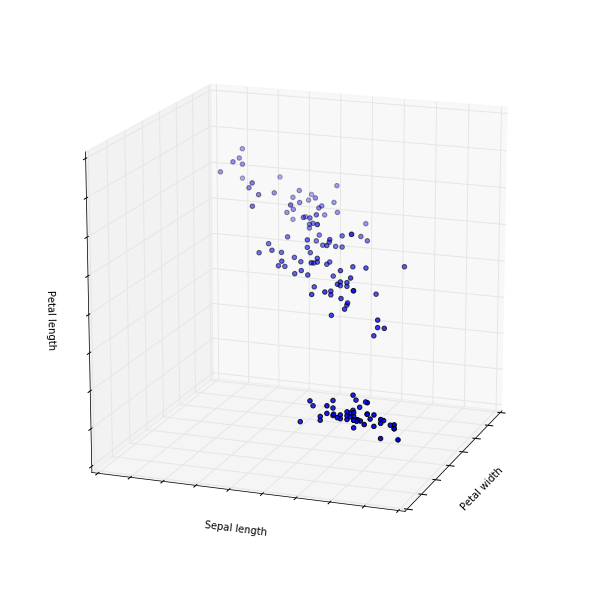

In [18]:
# plot raw data, without clusters
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=16, azim=200)
plt.cla()

ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2])

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

plt.show()

In [7]:
# do the clustering
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris) 
labels = k_means.labels_

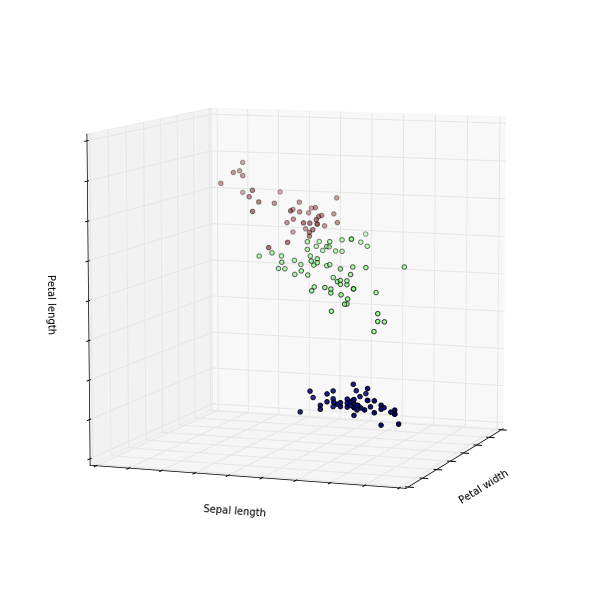

In [8]:
# plot the clusters in color
fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()

ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')

plt.show()

In [ ]:
# HEY AARON: I COMMENTED THIS OUT BY TELLING THE SLIDESHOW TO SKIP THIS SLIDE.
# check how many of the samples were correctly labeled
correct_labels = sum(y_iris == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_iris.size))

## Talk Feedback

This was our 0th talk!
Feedback?

* Too slow/fast?
* Balance of theory and practice?
* Fun? How improve?

## Discussion

Ask away!

For example:

* When does $K$-Means converge? Does it converge uniquely?
* How do we pick $K$?
* Which types of datasets work well with $K$-Means? Which don't?
* How might we improve $K$-Means?
* How do we cluster non-numerical data, for example text?
* What's another example of this two-step "E-M" iterative approach you mentioned? 
* How can I do clustering on my own? What are the good clustering packages?

TODO: add additional subslides for links/diagrams.

### How to select K 

It turns out, selecting k, the number of clusters to fit to your data, is actually a reasonabily hard problem to solve, that being said, several wikely used standards of practice exsist.

#### Rule of Thumb

$$
 k \approx \sqrt{\frac{n}{2}} 
$$

#### Guess and Check

If you know nothing about your data, you can simply run the k-means algorithm with many differnet values of K and see which one gives you the best result

#### More Advanced Approaches

Much more advanced, and sometimes more robust approaches exsist, but require a thurough understanding of informaiton theory. If you're interested, you can look at [this wikipedia article](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set). 

### Formal Mathematical Definition
$$
\text{Error} = \sum_{i = 1}^{K} \sum_{j=1}^{n} ||x_i^j - c_j||^2 
$$

$$
\text{Mean} = \frac{1}{n} \sum_{j=1}^{n} x_i
$$